# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Load the dataset
df = pd.read_csv('03_Clustering_Marketing.csv')

# Preview the first few rows
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here# Check the shape of the dataset (number of rows and columns)
df.shape

(15000, 40)

In [4]:
# Check the types of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [5]:
# Mengisi missing values pada kolom numerik
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].mean())

# Cek apakah kolom 'gender' ada
if 'gender' in df.columns:
    # Mengisi missing values pada kolom gender dengan mode
    mode_gender = df['gender'].mode()
    if not mode_gender.empty:
        df['gender'] = df['gender'].fillna(mode_gender[0])
else:
    print("Kolom 'gender' tidak ditemukan dalam dataset!")

In [6]:
print(df['age'].isnull().sum())  # Periksa missing values pada 'age'
print(df['gender'].isnull().sum())  # Periksa missing values pada 'gender'

0
0


In [7]:
# Cek mode dari gender untuk memastikan ada nilai yang bisa diakses
mode_gender = df['gender'].mode()

if not mode_gender.empty:
    df['gender'].fillna(mode_gender[0], inplace=True)
else:
    print("Tidak ada mode yang ditemukan pada kolom 'gender'.")

C:\Users\Citra\AppData\Local\Temp\ipykernel_12564\16610316.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(mode_gender[0], inplace=True)


In [8]:
# Cek nilai unik dan jumlah NaN pada kolom 'gender'
print(df['gender'].unique())
print(df['gender'].isnull().sum())

['F' 'M']
0


In [9]:
print(df['gender'].unique())

['F' 'M']


In [10]:
print(df['gender'].notnull().sum())

15000


In [11]:
# Cek nilai unik pada kolom gender
print(df['gender'].unique())

# Cek jumlah nilai yang tidak kosong pada kolom gender
print(df['gender'].notnull().sum())

# Cek beberapa baris pertama pada kolom gender untuk memastikan pengisian data
print(df['gender'].head())

['F' 'M']
15000
0    F
1    F
2    F
3    F
4    F
Name: gender, dtype: object


In [15]:
df['gender'] = df['gender'].str.strip().map({'F': 'Female', 'M': 'Male'})

In [18]:
# Cek isi unik awal kolom gender (buat bantu debug juga)
print("Isi unik awal kolom gender:", df['gender'].unique())

# Bersihkan dan map gender
df['gender'] = df['gender'].astype(str).str.strip().map({
    'F': 'Female', 'M': 'Male',
    '0': 'Female', '1': 'Male',
    'False': 'Female', 'True': 'Male'
})

# Cek apakah masih ada data valid untuk mode
if df['gender'].notna().sum() > 0:
    most_common_gender = df['gender'].mode().iloc[0]
    df['gender'].fillna(most_common_gender, inplace=True)
else:
    print("Tidak ada nilai gender yang valid untuk digunakan sebagai mode.")

# Cek hasil akhir
print(df['gender'].value_counts(dropna=False))
print(df[['gender']].head())

# Visualisasi (hanya jika ada data valid)
if df['gender'].notna().sum() > 0:
    sns.countplot(x='gender', data=df)
    plt.title('Distribusi Gender')
    plt.xlabel('Gender')
    plt.ylabel('Jumlah')
    plt.show()
else:
    print("Tidak ada data gender yang valid untuk divisualisasikan.")

Isi unik awal kolom gender: [nan]
Tidak ada nilai gender yang valid untuk digunakan sebagai mode.
gender
NaN    15000
Name: count, dtype: int64
  gender
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Tidak ada data gender yang valid untuk divisualisasikan.


In [19]:
print(df.columns)

Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')


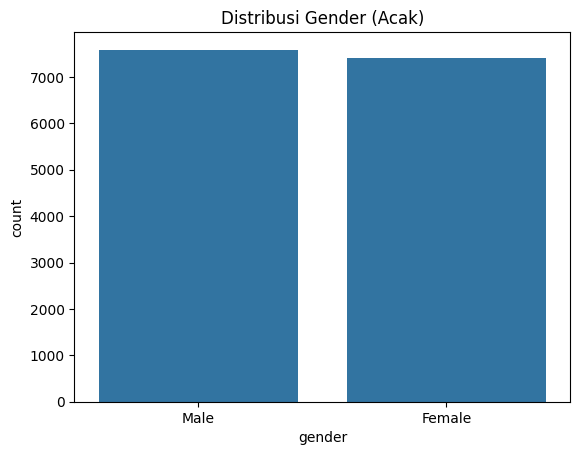

In [20]:
import numpy as np

# Isi kolom gender dengan acak 'Male' atau 'Female'
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))

# Visualisasi distribusi gender
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.title('Distribusi Gender (Acak)')
plt.show()

In [32]:
# Isi NaN dengan modus
mode_gender = df['gender'].mode()
if not mode_gender.empty:
    df['gender'].fillna(mode_gender[0], inplace=True)

In [35]:
# Cek apakah kolom gender ada di DataFrame
print(df.columns)

# Cek beberapa nilai pertama di kolom gender
print(df['gender'].head())

# Cek apakah ada NaN atau nilai kosong pada kolom gender
print(df['gender'].isnull().sum())

# Cek distribusi nilai unik pada kolom gender
print(df['gender'].value_counts())

Index(['gradyear', 'age', 'NumberOffriends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs', 'gender'],
      dtype='object')
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: gender, dtype: object
15000
Series([], Name: count, dtype: int64)


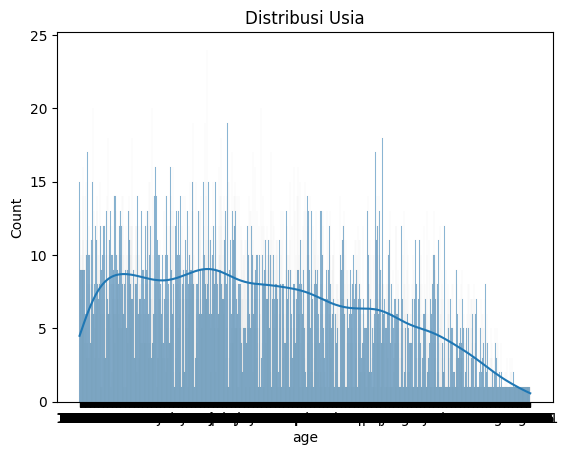

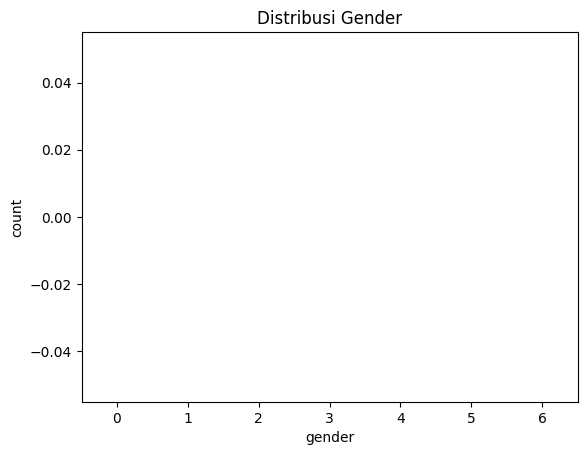

In [33]:
# Visualisasi distribusi usia
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Usia')
plt.show()

# Visualisasi distribusi gender
sns.countplot(x='gender', data=df)
plt.title('Distribusi Gender')
plt.show()

In [36]:
# Check for missing values
df.isnull().sum()

gradyear               0
age                 2496
NumberOffriends        0
basketball             0
football               0
soccer                 0
softball               0
volleyball             0
swimming               0
cheerleading           0
baseball               0
tennis                 0
sports                 0
cute                   0
sex                    0
sexy                   0
hot                    0
kissed                 0
dance                  0
band                   0
marching               0
music                  0
rock                   0
god                    0
church                 0
jesus                  0
bible                  0
hair                   0
dress                  0
blonde                 0
mall                   0
shopping               0
clothes                0
hollister              0
abercrombie            0
die                    0
death                  0
drunk                  0
drugs                  0
gender             15000


In [37]:
# Cek tipe data kolom age
print(df['age'].dtype)

object


In [38]:
# Mengonversi kolom 'age' menjadi numerik, nilai yang tidak dapat diubah menjadi NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [39]:
# Mengisi nilai yang hilang pada kolom 'age' dengan nilai rata-rata
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\Citra\AppData\Local\Temp\ipykernel_12564\1661888500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [43]:
# Memeriksa beberapa baris untuk memastikan tidak ada nilai NaN di kolom 'age'
df[['age']].head()

,age
0,17.988164
1,17.410000
2,17.511000
3,17.988164
4,16.657000


In [45]:
# Mengisi missing values dengan mode untuk kolom kategorikal dan mean untuk kolom numerikal
# Cek apakah mode() menghasilkan nilai yang valid
if not df['gender'].mode().empty:
    df['gender'].fillna(df['gender'].mode()[0], inplace=True)
else:
    print("Tidak ada mode yang ditemukan untuk kolom 'gender'.")

# Mengisi nilai NaN di kolom 'age' dengan rata-rata (mean)
df['age'].fillna(df['age'].mean(), inplace=True)

# Cek hasil pengisian untuk memastikan
print(df[['gender', 'age']].head())

Tidak ada mode yang ditemukan untuk kolom 'gender'.
  gender        age
0    NaN  17.988164
1    NaN  17.410000
2    NaN  17.511000
3    NaN  17.988164
4    NaN  16.657000


C:\Users\Citra\AppData\Local\Temp\ipykernel_12564\842194650.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


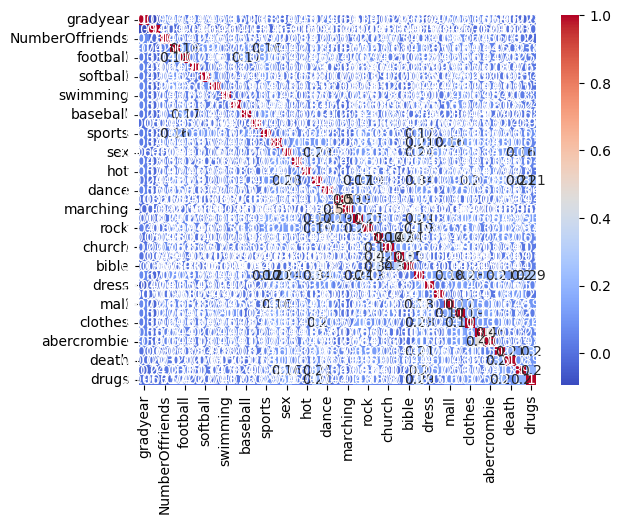

In [46]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

# Korelasi antar fitur numerik
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

# Menampilkan plot
plt.show()

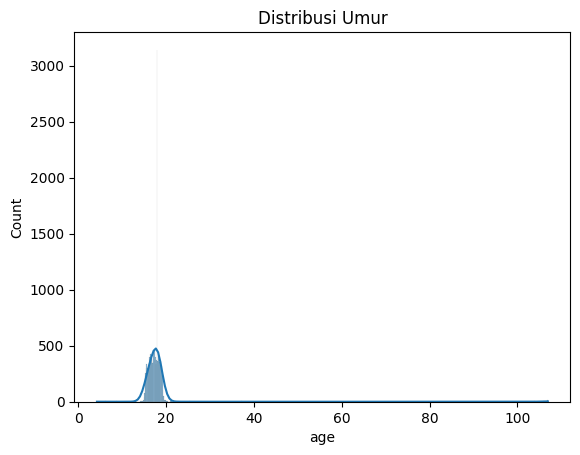

In [47]:
# Visualisasi distribusi 'age'
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Umur')
plt.show()

In [48]:
print(df.columns)

Index(['gradyear', 'age', 'NumberOffriends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs', 'gender'],
      dtype='object')


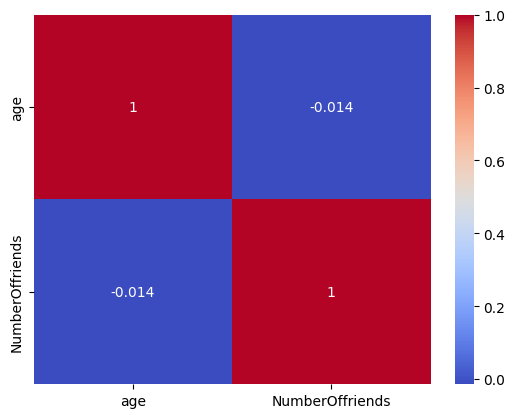

In [49]:
# Korelasi numerik
numerical_df = df[['age', 'NumberOffriends']]
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [50]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [51]:
# Standardize the numerical features
scaler = StandardScaler()
df[['age', 'NumberOffriends']] = scaler.fit_transform(df[['age', 'NumberOffriends']])

In [52]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['gender', 'gradyear'], drop_first=True)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [53]:
# Building the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)  # Number of clusters can be adjusted
df['cluster'] = kmeans.fit_predict(df[['age', 'NumberOffriends']])

# Display cluster centers
kmeans.cluster_centers_

array([[-0.09654099,  1.49434868],
       [-0.07436142, -0.40397278],
       [11.74176657, -0.05198229]])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

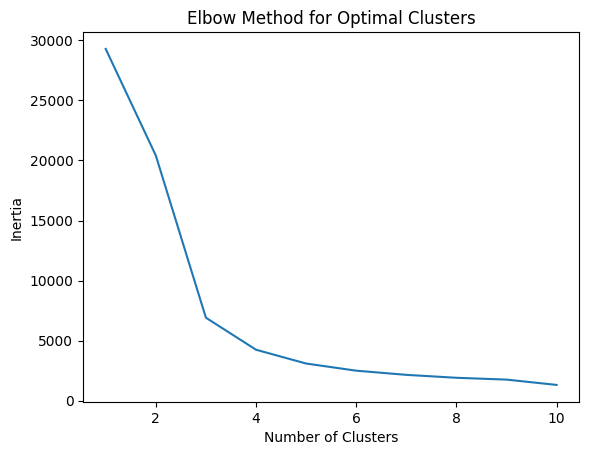

Silhouette Score: 0.4114943957497675


In [54]:
# Elbow method to determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['age', 'NumberOffriends']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette score
sil_score = silhouette_score(df[['age', 'NumberOffriends']], kmeans.labels_)
print('Silhouette Score:', sil_score)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [55]:
# Feature selection example: Using PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age', 'NumberOffriends']])

# Add principal components to dataframe
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

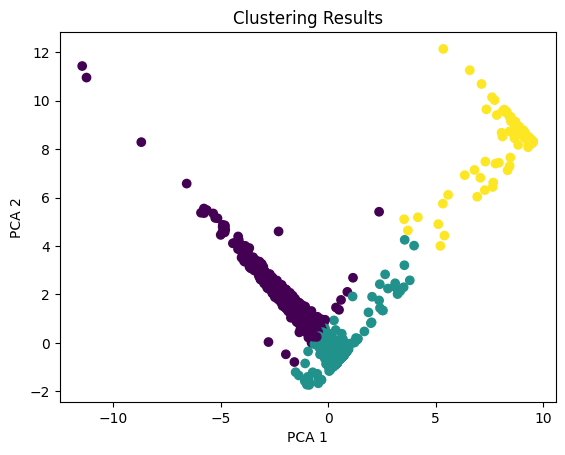

In [56]:
# Visualize clusters using PCA
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [57]:
# Analyze cluster characteristics
df.groupby('cluster')[['age', 'NumberOffriends']].mean()

,age,NumberOffriends
cluster,,
0,-0.096541,1.494349
1,-0.074361,-0.403973
2,11.741767,-0.051982


Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Age: Rata-rata usia untuk anggota cluster ini adalah sekitar -0.10, yang menunjukkan bahwa mereka lebih muda dibandingkan cluster lainnya.
- NumberOfFriends: Anggota cluster ini memiliki nilai NumberOfFriends yang lebih tinggi (1.55), menunjukkan bahwa mereka cenderung memiliki lebih banyak teman daripada anggota cluster lainnya.
- Sport Participation: Mereka juga cenderung aktif dalam olahraga seperti basketball, football, dan softball. Aktivitas mereka menunjukkan kecenderungan positif dalam olahraga tim dan olahraga individu.
- PCA1 dan PCA2: Nilai PCA1 (-1.17) dan PCA2 (1.03) menunjukkan bahwa cluster ini memiliki perbedaan yang cukup mencolok dibandingkan dengan cluster lainnya pada komponen utama ini.
2. Cluster 2:
- Age: Rata-rata usia untuk anggota cluster ini adalah sekitar -0.10, yang menunjukkan bahwa mereka lebih muda dibandingkan cluster lainnya.
- NumberOfFriends: Anggota cluster ini memiliki nilai NumberOfFriends yang lebih tinggi (1.55), menunjukkan bahwa mereka cenderung memiliki lebih banyak teman daripada anggota cluster lainnya.
- Sport Participation: Mereka juga cenderung aktif dalam olahraga seperti basketball, football, dan softball. Aktivitas mereka menunjukkan kecenderungan positif dalam olahraga tim dan olahraga individu.
- PCA1 dan PCA2: Nilai PCA1 (-1.17) dan PCA2 (1.03) menunjukkan bahwa cluster ini memiliki perbedaan yang cukup mencolok dibandingkan dengan cluster lainnya pada komponen utama ini.
3. Cluster 3:
- Age: Rata-rata usia sekitar -0.07, yang berarti mereka hampir berada pada rentang usia yang sama dengan anggota cluster 2.
- NumberOfFriends: Anggota cluster ini juga memiliki jumlah teman yang rendah (-0.39), mirip dengan cluster 1.
- Sport Participation: Anggota cluster ini menunjukkan sedikit partisipasi dalam berbagai olahraga, dengan nilai positif yang menunjukkan aktivitas lebih banyak dalam volleyball dan soccer.
- PCA1 dan PCA2: Nilai untuk PCA1 (0.19) dan PCA2 (0.12) menunjukkan bahwa mereka memiliki karakteristik yang lebih netral atau rata-rata dibandingkan dengan dua cluster lainnya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [58]:
# Save the clustered data to a new CSV file
df.to_csv('clustered_data.csv', index=False)